# House Prices - Advanced Regression Techniques

## GARAGE FEATURES

***

Predict sales prices and practice feature engineering, RFs, and gradient boosting

***

**PROJECT DESCRIPTION:**



**DATA FIELDS**

Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSZoning: The general zoning classification

Street: Type of road access

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

OverallCond: Overall condition rating

YearBuilt: Original construction date

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway



# IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import StandardScaler

# HELPER FUNCTIONS

# LOADING DATA

In [2]:
# data import
df_train_raw = pd.read_csv('train.csv')
df_test_raw = pd.read_csv('test.csv')
y_test_raw = pd.read_csv('sample_submission.csv')

# merge test dataset and sample submission dataset
df_test_raw = pd.merge(df_test_raw, y_test_raw, on = 'Id', how = 'inner')

# merge train and test dataset
df1 = pd.concat([df_train_raw, df_test_raw])

df1.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
830,831,20,RL,80.0,11900,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,166000.000000
955,956,90,RH,82.0,7136,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,145000.000000
544,545,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,179665.000000
1132,1133,70,RM,90.0,9900,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,117500.000000
117,1578,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,184380.739101


In [3]:
df1 =df1[['Condition1', 'Condition2','GarageArea','GarageCars','GarageCond',
         'GarageFinish','GarageQual','GarageType','GarageYrBlt','MSZoning',
         'OverallCond','PavedDrive','Street','YearBuilt','SalePrice']]

# DATA DESCRIPTION

## DATA TYPES

In [4]:
#shape
df1.shape

(2919, 15)

In [5]:
# columns
df1.columns

Index(['Condition1', 'Condition2', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'MSZoning',
       'OverallCond', 'PavedDrive', 'Street', 'YearBuilt', 'SalePrice'],
      dtype='object')

In [6]:
# data types
for f in df1:
    a = abs(len(f) - 20)
    print(f + (" " * a)  + str(df1[f].dtypes))

Condition1          object
Condition2          object
GarageArea          float64
GarageCars          float64
GarageCond          object
GarageFinish        object
GarageQual          object
GarageType          object
GarageYrBlt         float64
MSZoning            object
OverallCond         int64
PavedDrive          object
Street              object
YearBuilt           int64
SalePrice           float64


## MISSING VALUES

In [7]:
# Missing values
missing = df1.isnull().sum()
aux = pd.DataFrame(missing[missing > 0].sort_values(ascending = False), columns = ['variables'])

# count + percentage
aux['percentage'] = aux['variables'].apply(lambda x : (x / (df1.shape[0]) * 100))

aux

,variables,percentage
GarageYrBlt,159,5.447071
GarageQual,159,5.447071
GarageFinish,159,5.447071
GarageCond,159,5.447071
GarageType,157,5.378554
MSZoning,4,0.137033
GarageCars,1,0.034258
GarageArea,1,0.034258


In [8]:
# dropping missing values > 40%
#df1 = df1.drop(columns=aux[aux['percentage'] > 40].index)

# ffill missing values < 1
df1.loc[:, aux[aux['percentage'] < 1].index] = df1.loc[:, aux[aux['percentage'] < 1].index].fillna(method = 'ffill') 

# fillna - mode
aux2 = df1.loc[:, aux[(aux['percentage'] > 1) & (aux['percentage'] < 17)].index]

for c in aux2.columns:
    df1[c].fillna(df1[c].mode()[0], inplace=True)

# Missing values
missing = df1.isnull().sum()
aux = pd.DataFrame(missing[missing > 0].sort_values(ascending = False), columns = ['variables'])

aux

,variables


# DIMENSIONS ANALYSIS

In [9]:
# numerical attributes
num_attributes = df1.select_dtypes(include=['int64', 'float64'])

# categorical attributes
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64'])

### Numerical Features

In [10]:
cols = num_attributes.columns

def funcao_value_counts():
    for d in num_attributes[cols]:
        print((num_attributes[d].value_counts(normalize = True) * 100).sort_values(ascending = False))
        
funcao_value_counts()


0.0       5.412813
576.0     3.323056
440.0     3.288798
240.0     2.363823
484.0     2.329565
            ...   
753.0     0.034258
815.0     0.034258
325.0     0.034258
1390.0    0.034258
803.0     0.034258
Name: GarageArea, Length: 603, dtype: float64
2.0    54.607742
1.0    26.584447
3.0    12.812607
0.0     5.412813
4.0     0.548133
5.0     0.034258
Name: GarageCars, dtype: float64
2005.0    10.311751
2006.0     3.939705
2007.0     3.939705
2004.0     3.391572
2003.0     3.151764
            ...    
1919.0     0.034258
1895.0     0.034258
2207.0     0.034258
1908.0     0.034258
1896.0     0.034258
Name: GarageYrBlt, Length: 103, dtype: float64
5    56.354916
6    18.191161
7    13.360740
8     4.933196
4     3.460089
3     1.712915
9     1.404591
2     0.342583
1     0.239808
Name: OverallCond, dtype: float64
2005    4.864680
2006    4.727646
2007    3.734156
2004    3.391572
2003    3.014731
          ...   
1902    0.034258
1898    0.034258
1896    0.034258
1882    0.034258
1872

### Categorical Features

In [12]:
cols = cat_attributes.columns

def funcao_value_counts():
    for d in cat_attributes[cols]:
        print((cat_attributes[d].value_counts(normalize = True) * 100).sort_values(ascending = False))
        
funcao_value_counts()


Norm      86.022610
Feedr      5.618362
Artery     3.151764
RRAn       1.712915
PosN       1.336074
RRAe       0.959233
PosA       0.685166
RRNn       0.308325
RRNe       0.205550
Name: Condition1, dtype: float64
Norm      98.972251
Feedr      0.445358
Artery     0.171292
PosA       0.137033
PosN       0.137033
RRNn       0.068517
RRAn       0.034258
RRAe       0.034258
Name: Condition2, dtype: float64
TA    96.368619
Fa     2.535115
Gd     0.513875
Po     0.479616
Ex     0.102775
Name: GarageCond, dtype: float64
Unf    47.584789
RFn    27.783487
Fin    24.631723
Name: GarageFinish, dtype: float64
TA    94.655704
Fa     4.248030
Gd     0.822199
Po     0.171292
Ex     0.102775
Name: GarageQual, dtype: float64
Attchd     64.405618
Detchd     26.687222
BuiltIn     6.372045
Basment     1.233299
2Types      0.787941
CarPort     0.513875
Name: GarageType, dtype: float64
RL         77.663583
RM         15.827338
FV          4.761905
RH          0.890716
C (all)     0.856458
Name: MSZoning, dt

# DESCRIPTIVE STATISTICS

## Numerical Attributes

In [13]:
# Central Tendency - mean, median, mode
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
#ct3 = pd.DataFrame(num_attributes.apply(mode)).T

# Dipersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T

# concat
t = pd.concat([ct1, ct2, d1, d2, d3, d4]).T.reset_index()
t.columns = ['attributes', 'mean', 'median', 'std', 'min', 'max', 'range']
t



,attributes,mean,median,std,min,max,range
0,GarageArea,472.712573,480.000000,215.498763,0.0,1488.0,1488.0
1,GarageCars,1.766016,2.000000,0.762065,0.0,5.0,5.0
2,GarageYrBlt,1979.577938,1984.000000,25.601272,1895.0,2207.0,312.0
3,OverallCond,5.564577,5.000000,1.112940,1.0,9.0,8.0
4,YearBuilt,1971.312778,1973.000000,30.286252,1872.0,2010.0,138.0
5,SalePrice,180052.854647,176734.841494,57371.735902,34900.0,755000.0,720100.0


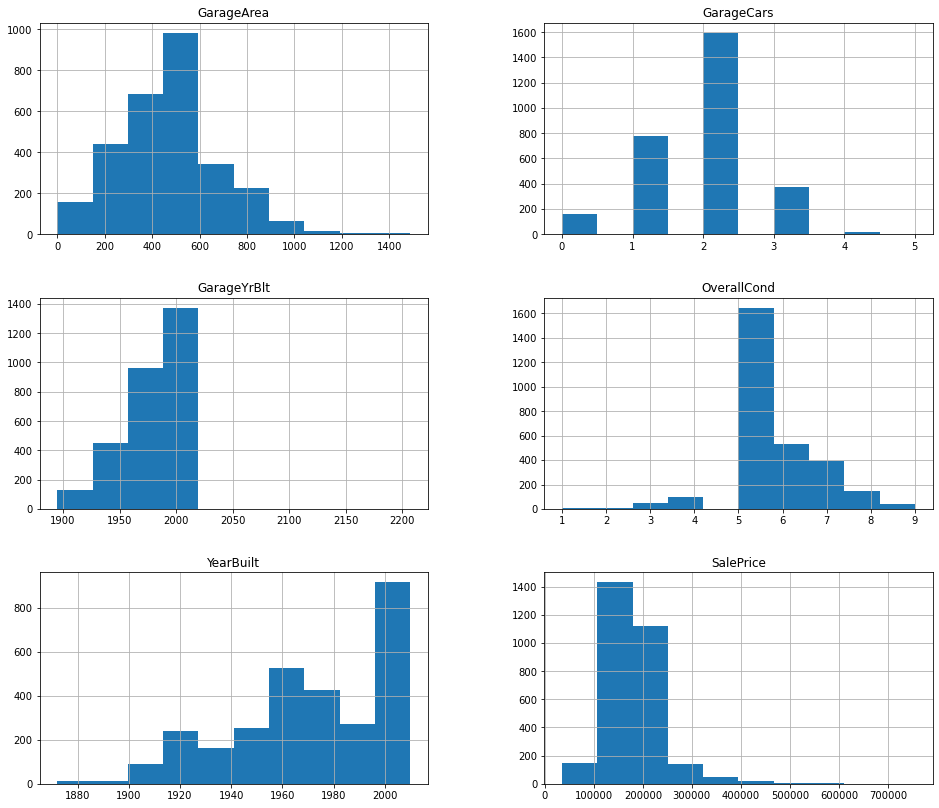

In [14]:
df1[num_attributes.columns].hist(figsize=(16,14));


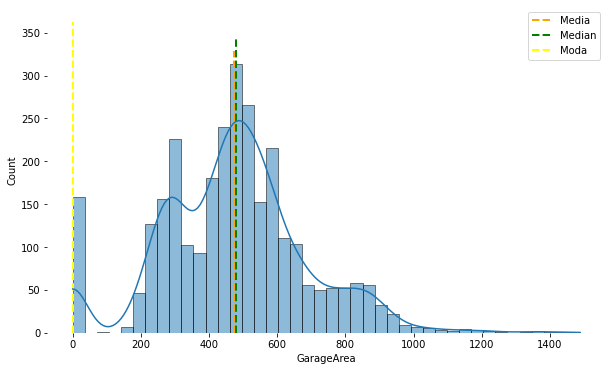

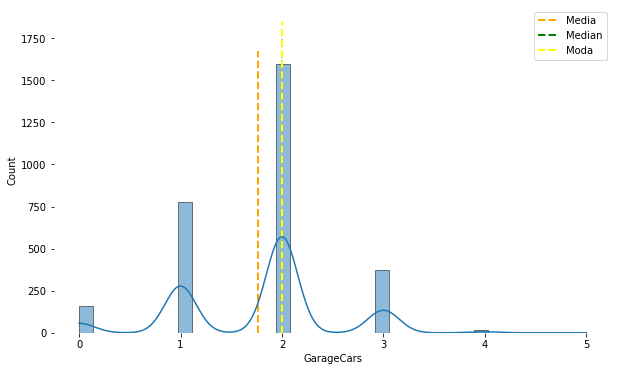

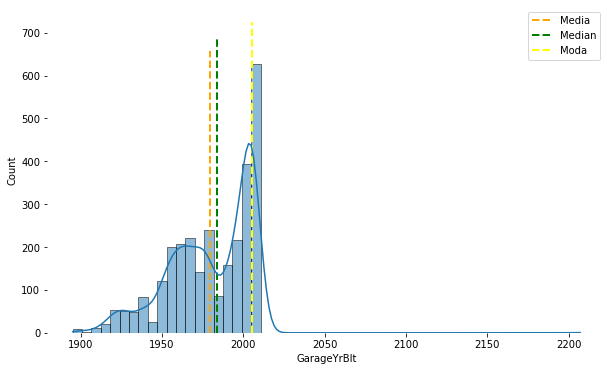

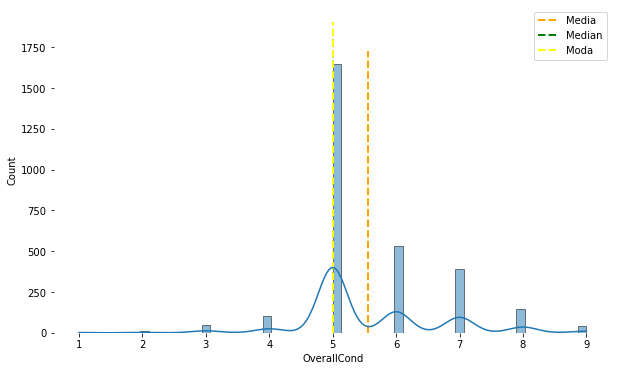

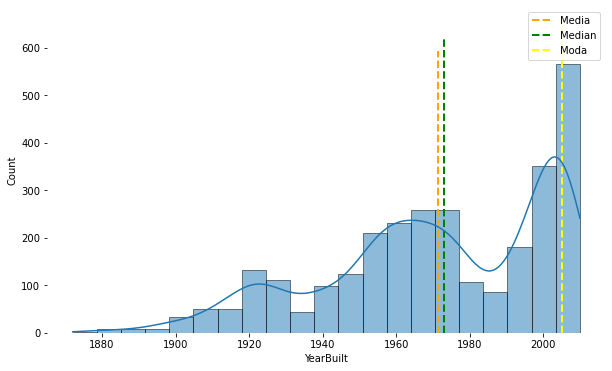

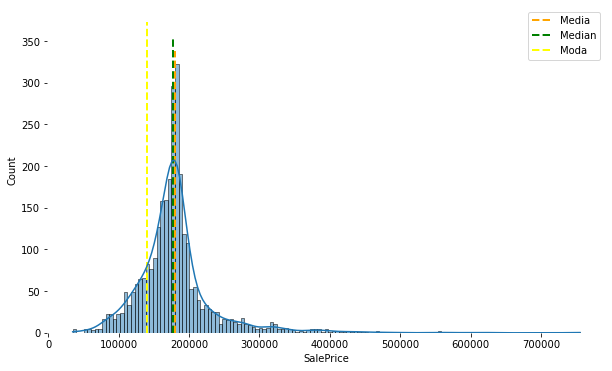

In [15]:
for a in df1[num_attributes.columns]:
    
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(df1[num_attributes.columns][a], kde = True, linewidth = 0.5)
    sns.despine(bottom = True, left = True)
    
    plt.vlines( x = df1[num_attributes.columns][a].mean(), linewidth = 2, color = 'orange',
              ymin = 0, ymax = ax.get_ylim()[1],
              label = 'Media', linestyle = '--')
    
    plt.vlines( x = df1[num_attributes.columns][a].median(), linewidth = 2, color = 'green',
              ymin = 0, ymax = ax.get_ylim()[1],
              label = 'Median', linestyle = '--')
    
    plt.vlines( x = df1[num_attributes.columns][a].mode()[0], linewidth = 2, color = 'yellow',
              ymin = 0, ymax = ax.get_ylim()[1],
              label = 'Moda', linestyle = '--')
    
    
    plt.legend()
    

## Categorical Attributes

In [16]:
df1[cat_attributes.columns].apply(lambda x: x.unique().shape[0])

Condition1      9
Condition2      8
GarageCond      5
GarageFinish    3
GarageQual      5
GarageType      6
MSZoning        5
PavedDrive      3
Street          2
dtype: int64

In [17]:
def cat_boxplot(variavel):
    plt.figure(figsize=(12, 5))
    ax = sns.boxplot(data = df1[[variavel, 'SalePrice']],
                 y = 'SalePrice', x = variavel,hue = variavel, dodge = False)
    sns.despine(bottom = True, left = True);

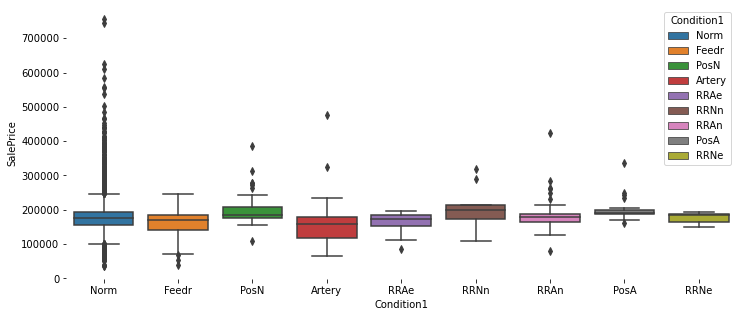

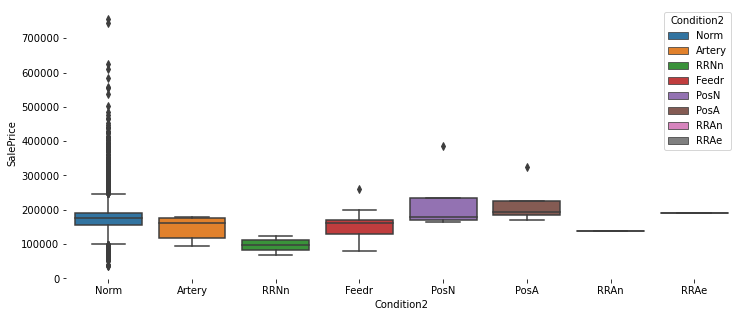

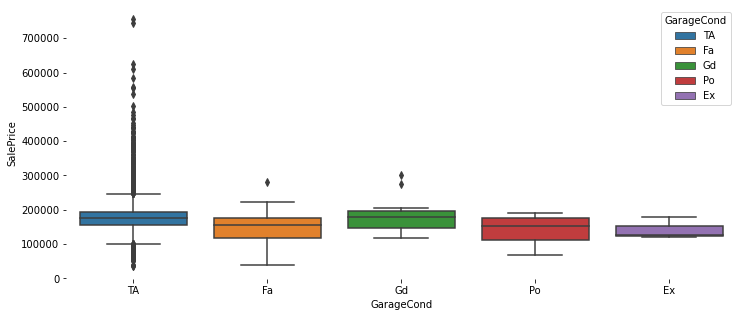

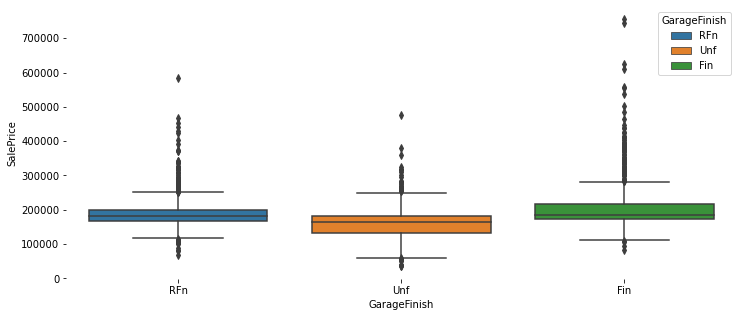

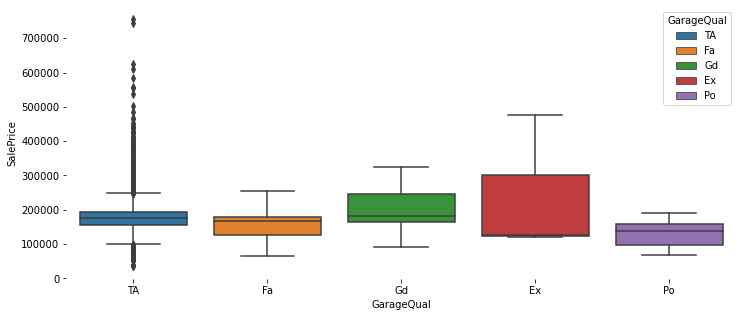

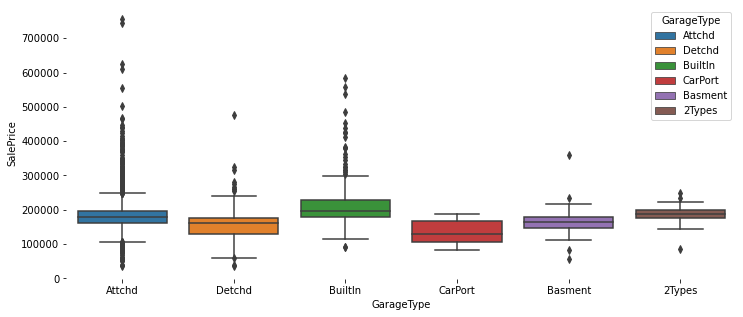

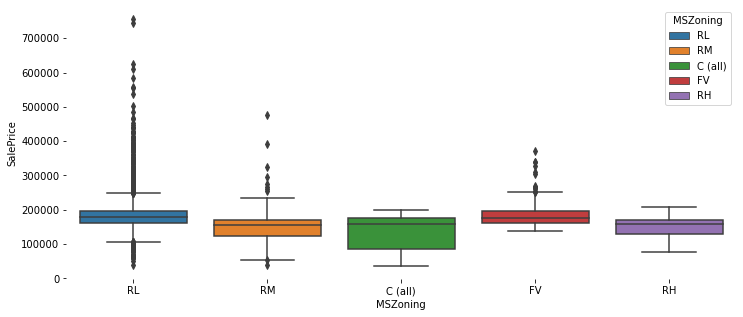

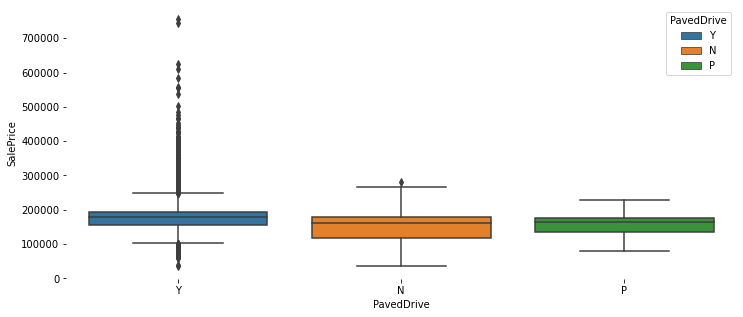

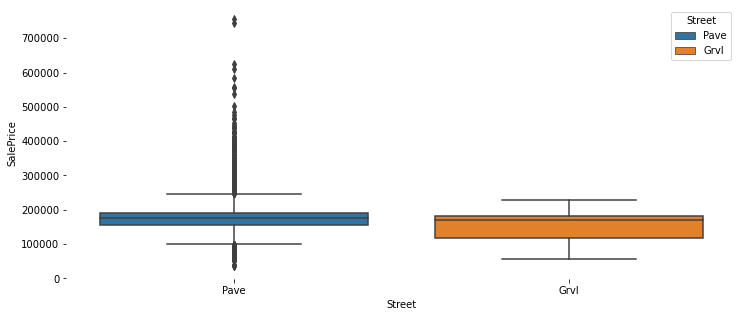

In [18]:
for g in df1[cat_attributes.columns]:
    cat_boxplot(g)